In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Step 2: Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/elc/train.csv')

In [3]:
# Step 3: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('label', axis=1), train_df['label'], test_size=0.2, random_state=42)

# Step 4: Preprocess the data by scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [4]:
# Step 5: Train KNN classifier with K = 3, 5, 7, 9, 11 using the training set
k_values = [3, 5, 7, 9, 11]
val_accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    val_accuracy.append(knn.score(X_val_scaled, y_val))

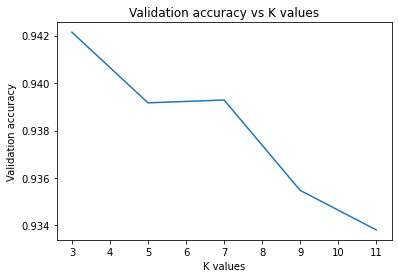

In [5]:
# Step 6: Evaluate the model on the validation set and record the accuracy
plt.plot(k_values, val_accuracy)
plt.xlabel('K values')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy vs K values')
plt.show()

In [6]:
# Step 7: Select the best K value based on the validation set performance
best_k = k_values[np.argmax(val_accuracy)]
print(f'Best K value: {best_k}')

Best K value: 3


In [7]:
# Step 8: Train a final KNN classifier on the entire training set using the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Step 9: Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/elc/test.csv')

In [10]:
# Step 10: Preprocess the test data by scaling the features
X_test_scaled = scaler.transform(test_df.drop('label', axis=1))

In [11]:
# Step 11: Test the trained model on the test dataset and generate a confusion matrix
y_pred = knn.predict(X_test_scaled)
confusion_mat = confusion_matrix(test_df['label'], y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[ 969    1    0    1    0    3    6    0    0    0]
 [   0 1130    3    1    0    0    1    0    0    0]
 [  13    6  980    7    3    1    6    6    8    2]
 [   2    3    5  968    3    9    0    8    8    4]
 [   1    8    6    2  938    1    5    3    1   17]
 [   7    0    5   19    6  833    8    2    8    4]
 [  10    4    2    0    2    6  932    0    2    0]
 [   0   21   10    3   10    1    0  963    0   20]
 [  12    3    8   21    8   21    1    6  888    6]
 [   7    5    3   14   14    6    0   22    0  938]]


In [12]:
# Step 12: Calculate the precision, recall, and F1 score based on the confusion matrix
precision = precision_score(test_df['label'], y_pred, average='macro')
recall = recall_score(test_df['label'], y_pred, average='macro')
f1 = f1_score(test_df['label'], y_pred, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 score: {f1:.4f}')

Precision: 0.9540, Recall: 0.9532, F1 score: 0.9534
